## EDA on IPL Dataset

**Importing libraries**

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [116]:
data = pd.read_csv("matches.csv")
data.head(5)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


**How big is the dataset? (Rows and columns)**

In [117]:
data.shape

(756, 18)

In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
id                 756 non-null int64
Season             756 non-null object
city               749 non-null object
date               756 non-null object
team1              756 non-null object
team2              756 non-null object
toss_winner        756 non-null object
toss_decision      756 non-null object
result             756 non-null object
dl_applied         756 non-null int64
winner             752 non-null object
win_by_runs        756 non-null int64
win_by_wickets     756 non-null int64
player_of_match    752 non-null object
venue              756 non-null object
umpire1            754 non-null object
umpire2            754 non-null object
umpire3            119 non-null object
dtypes: int64(4), object(14)
memory usage: 106.4+ KB


**Data Pre-processing: Finding out NaN values**

In [119]:
data.isna().any()

id                 False
Season             False
city                True
date               False
team1              False
team2              False
toss_winner        False
toss_decision      False
result             False
dl_applied         False
winner              True
win_by_runs        False
win_by_wickets     False
player_of_match     True
venue              False
umpire1             True
umpire2             True
umpire3             True
dtype: bool

In [120]:
data.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

**Statistical Description of dataset**

In [121]:
data.describe()

,id,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,0.025132,13.283069,3.350529
std,3464.478148,0.156630,23.471144,3.387963
min,1.000000,0.000000,0.000000,0.000000
25%,189.750000,0.000000,0.000000,0.000000
50%,378.500000,0.000000,0.000000,4.000000
75%,567.250000,0.000000,19.000000,6.000000
max,11415.000000,1.000000,146.000000,10.000000


**How many matches (in total) were played according to the dataset?**

In [122]:
data['id'].count()

756

**How many IPL seasons are we using to analyse?**

In [123]:
data['Season'].unique()

array(['IPL-2017', 'IPL-2008', 'IPL-2009', 'IPL-2010', 'IPL-2011',
       'IPL-2012', 'IPL-2013', 'IPL-2014', 'IPL-2015', 'IPL-2016',
       'IPL-2018', 'IPL-2019'], dtype=object)

In [124]:
len(data['Season'].unique())

12

**Which IPL team won by scoring the maximum runs?**

In [125]:
data.iloc[data['win_by_runs'].idxmax()]

id                               44
Season                     IPL-2017
city                          Delhi
date                     06-05-2017
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object

**Which IPL team won by consuming maximum wickets?**

In [126]:
data.iloc[data['win_by_wickets'].idxmax()]

id                                                      3
Season                                           IPL-2017
city                                               Rajkot
date                                           07-04-2017
team1                                       Gujarat Lions
team2                               Kolkata Knight Riders
toss_winner                         Kolkata Knight Riders
toss_decision                                       field
result                                             normal
dl_applied                                              0
winner                              Kolkata Knight Riders
win_by_runs                                             0
win_by_wickets                                         10
player_of_match                                   CA Lynn
venue              Saurashtra Cricket Association Stadium
umpire1                                       Nitin Menon
umpire2                                         CK Nandan
umpire3       

**Which IPL team won by taking minimum wickets?**

In [127]:
data.iloc[data['win_by_wickets'].idxmin()]

id                                                         1
Season                                              IPL-2017
city                                               Hyderabad
date                                              05-04-2017
team1                                    Sunrisers Hyderabad
team2                            Royal Challengers Bangalore
toss_winner                      Royal Challengers Bangalore
toss_decision                                          field
result                                                normal
dl_applied                                                 0
winner                                   Sunrisers Hyderabad
win_by_runs                                               35
win_by_wickets                                             0
player_of_match                                 Yuvraj Singh
venue              Rajiv Gandhi International Stadium, Uppal
umpire1                                          AY Dandekar
umpire2                 

**Which season consisted of the highest number of matches ever played?**

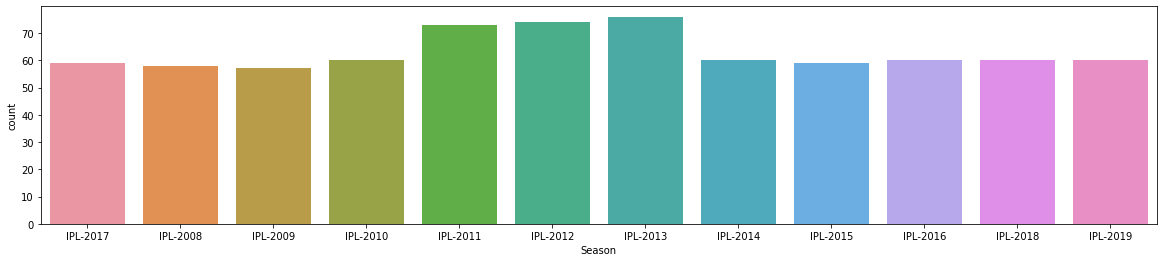

In [128]:
plt.figure(figsize=(20,4))
sns.countplot(x=data['Season'])

**Which is the most successful IPL team with all the data at hand?**

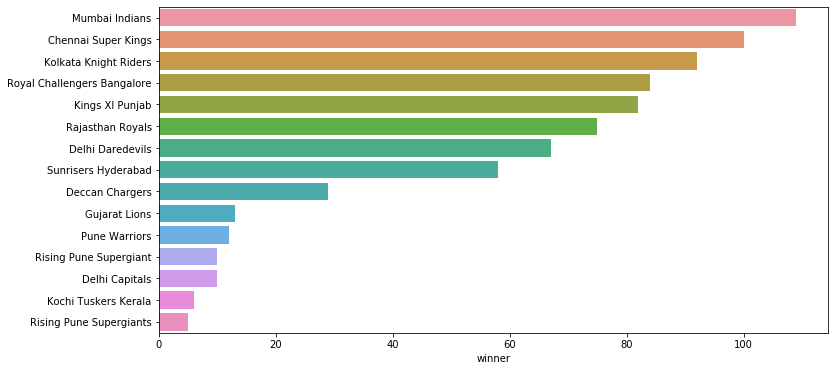

In [129]:
plt.figure(figsize=(12,6))
data1 = data['winner'].value_counts()
sns.barplot(x = data1, y = data1.index)

In [130]:
import plotly.express as px

In [131]:
fig = px.bar(y = data1.index,x = data1,title="Most successful IPL teams")
fig.update_layout(barmode='stack',yaxis={'categoryorder':'total ascending'})
fig.update_layout(xaxis_title="No. of Matches")
fig.show()

**What is the probability of winning a match if the toss was won?**

In [132]:
probability_of_win = data['toss_winner'] == data['winner']

probability_of_win.groupby(probability_of_win).size()

False    363
True     393
dtype: int64

C:\Users\Shankar Wagh SNR\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



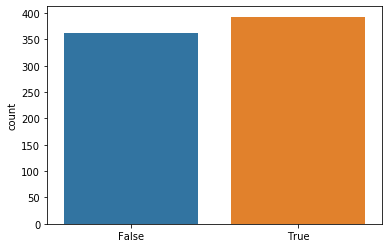

In [133]:
sns.countplot(probability_of_win)

**Setting a higher row width**

In [134]:
pd.set_option('max_rows', 99999)
pd.set_option('max_colwidth', 400)
pd.describe_option('max_colwidth')

display.max_colwidth : int
    The maximum width in characters of a column in the repr of
    a pandas data structure. When the column overflows, a "..."
    placeholder is embedded in the output.
    [default: 50] [currently: 400]




**Highest wins by teams per season**

In [135]:
data.groupby('Season')['winner'].value_counts()

Season    winner                     
IPL-2008  Rajasthan Royals               13
          Kings XI Punjab                10
          Chennai Super Kings             9
          Delhi Daredevils                7
          Mumbai Indians                  7
          Kolkata Knight Riders           6
          Royal Challengers Bangalore     4
          Deccan Chargers                 2
IPL-2009  Delhi Daredevils               10
          Deccan Chargers                 9
          Royal Challengers Bangalore     9
          Chennai Super Kings             8
          Kings XI Punjab                 7
          Rajasthan Royals                6
          Mumbai Indians                  5
          Kolkata Knight Riders           3
IPL-2010  Mumbai Indians                 11
          Chennai Super Kings             9
          Deccan Chargers                 8
          Royal Challengers Bangalore     8
          Delhi Daredevils                7
          Kolkata Knight Riders       

In [136]:
data.groupby('Season')['winner'].value_counts()

Season    winner                     
IPL-2008  Rajasthan Royals               13
          Kings XI Punjab                10
          Chennai Super Kings             9
          Delhi Daredevils                7
          Mumbai Indians                  7
          Kolkata Knight Riders           6
          Royal Challengers Bangalore     4
          Deccan Chargers                 2
IPL-2009  Delhi Daredevils               10
          Deccan Chargers                 9
          Royal Challengers Bangalore     9
          Chennai Super Kings             8
          Kings XI Punjab                 7
          Rajasthan Royals                6
          Mumbai Indians                  5
          Kolkata Knight Riders           3
IPL-2010  Mumbai Indians                 11
          Chennai Super Kings             9
          Deccan Chargers                 8
          Royal Challengers Bangalore     8
          Delhi Daredevils                7
          Kolkata Knight Riders       

In [137]:
data['toss_decision'].value_counts()

field    463
bat      293
Name: toss_decision, dtype: int64

**Man of the match - Highest to lowest (in won matches)**

In [138]:
data2 = data['player_of_match'].value_counts()[0:55]

In [139]:
data2

CH Gayle            21
AB de Villiers      20
RG Sharma           17
MS Dhoni            17
DA Warner           17
YK Pathan           16
SR Watson           15
SK Raina            14
G Gambhir           13
AM Rahane           12
MEK Hussey          12
V Kohli             12
DR Smith            11
AD Russell          11
A Mishra            11
V Sehwag            11
JH Kallis           10
KA Pollard          10
AT Rayudu            9
SE Marsh             9
SP Narine            9
RA Jadeja            8
UT Yadav             8
SR Tendulkar         8
Harbhajan Singh      8
RV Uthappa           7
Rashid Khan          7
AC Gilchrist         7
M Vijay              6
HH Pandya            6
A Nehra              6
S Dhawan             6
SL Malinga           6
RR Pant              6
BJ Hodge             6
SPD Smith            5
BB McCullum          5
JC Buttler           5
SV Samson            5
Sandeep Sharma       5
Yuvraj Singh         5
JP Faulkner          5
PA Patel             5
JJ Bumrah  

In [140]:
data[data['player_of_match'] =='CH Gayle'].shape[0]

21

In [141]:
fig = px.line(x = data2.index, y = data2,)
fig.show()

**In which city were the number of matches played?**

In [142]:
data['city'].value_counts()

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Centurion          12
Ahmedabad          12
Mohali             10
Rajkot             10
Indore              9
Dharamsala          9
Johannesburg        8
Abu Dhabi           7
Cape Town           7
Ranchi              7
Cuttack             7
Port Elizabeth      7
Raipur              6
Sharjah             6
Kochi               5
Kanpur              4
East London         3
Kimberley           3
Nagpur              3
Bloemfontein        2
Name: city, dtype: int64

In [36]:
fig = px.bar(y = data1.index, x = data1,title="Most successful IPL teams")
fig.update_layout(barmode='stack',yaxis={'categoryorder':'total ascending'})
fig.update_layout(xaxis_title="No. of Matches")
fig.show()

In [45]:
data5 = data['venue'].value_counts()
fig = px.bar(y = data5.index, x = data5, title="Number Of Matches Played")
fig.update_layout(barmode='stack',yaxis={'categoryorder':'total ascending'})
fig.update_layout(xaxis_title="No. of Matches")

fig.show()

In [46]:
data2 = data['player_of_match'].value_counts()[0:55]
fig = px.line(x = data2.index, y = data2,)
fig.show()

In [ ]:
def data_over_time(data,'player_of_match'):
    data2 = data['player_of_match'].value_counts()[0:55]
    
    data2.rename(columns={'index':'Edition','Year': col},inplace = True)
    return nation_over_time

In [48]:
pd.DataFrame(data['player_of_match'].value_counts()[0:55])
data2.rename(columns={'index':'Player Name','player_of_match': No },inplace = True)

,player_of_match
CH Gayle,21
AB de Villiers,20
RG Sharma,17
MS Dhoni,17
DA Warner,17
YK Pathan,16
SR Watson,15
SK Raina,14
G Gambhir,13
AM Rahane,12


In [ ]:
fig = px.bar(y = data1.index, x = data1,title="Most successful IPL teams")
fig.update_layout(barmode='stack',yaxis={'categoryorder':'total ascending'})
fig.update_layout(xaxis_title="No. of Matches")
fig.show()

In [ ]:

data1 = data['winner'].value_counts()

In [113]:
def most_successful_team(data):
    new_data = data['winner'].value_counts().reset_index()
    new_data.rename(columns={'index':'Team Name','winner':'No of Matches Win'},inplace=True)
    return new_data

In [114]:
team_data = most_successful_team(data)
fig=px.bar(team_data,x='No of Matches Win',y='Team Name')
fig.update_layout(barmode='stack',yaxis={'categoryorder':'total ascending'})
fig.show()

In [74]:
def fetch_venue_data(data):
    venue_data = data['venue'].value_counts().reset_index()
    venue_data.rename(columns={'index':'Stadium Name','venue':'No of Matches'},inplace=True)
    return venue_data

In [75]:
venue_data = fetch_venue_data(data)

In [82]:
fig = px.bar(venue_data,y='Stadium Name',x='No of Matches')
fig.update_layout(barmode='stack', yaxis={'categoryorder':'total ascending'})
fig.show()

In [85]:
def fetch_player_data(data):
    player_data = data['player_of_match'].value_counts()[0:55].reset_index()
    player_data.rename(columns={'index':'Player Name','player_of_match':'No of Times Man Of The Match'},inplace=True)
    return player_data

In [87]:
player_data = fetch_player_data(data)

In [90]:
fig = px.line(player_data,x='Player Name',y='No of Times Man Of The Match')
fig.show()

13